In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

#Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/train/',
                                        target_size=(224,224),
                                        class_mode='sparse')
val_set=validation.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/val/',
                                        target_size=(224,224),
                                        class_mode='sparse')

test_set=test.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/test/',
                                        target_size=(224,224),
                                        class_mode='sparse',
                                        shuffle=False)

Found 1750 images belonging to 5 classes.
Found 375 images belonging to 5 classes.
Found 375 images belonging to 5 classes.


In [ ]:
train_set.class_indices

{'hand0': 0, 'hand1': 1, 'hand13': 2, 'hand5': 3, 'hand8': 4}

In [ ]:
val_set.class_indices

{'hand0': 0, 'hand1': 1, 'hand13': 2, 'hand5': 3, 'hand8': 4}

In [ ]:
train_set.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
x_batch, y_batch = next(test_set)

In [ ]:
len(y_batch)

32

#Transfer learning- Xception

In [ ]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False) 
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers: 
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=val_set, epochs=3)

Epoch 1/3
55/55 [==============================] - 398s 7s/step - loss: 0.5882 - accuracy: 0.7869 - val_loss: 0.1778 - val_accuracy: 0.9280
Epoch 2/3
55/55 [==============================] - 10s 172ms/step - loss: 0.1376 - accuracy: 0.9509 - val_loss: 0.1370 - val_accuracy: 0.9467
Epoch 3/3
55/55 [==============================] - 10s 174ms/step - loss: 0.0909 - accuracy: 0.9686 - val_loss: 0.1588 - val_accuracy: 0.9440


In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
#metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
history = model.fit(train_set, validation_data=val_set, epochs=5)

Epoch 1/5
55/55 [==============================] - 30s 333ms/step - loss: 0.1100 - accuracy: 0.9583 - val_loss: 0.0246 - val_accuracy: 0.9947
Epoch 2/5
55/55 [==============================] - 17s 306ms/step - loss: 0.0061 - accuracy: 0.9966 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/5
55/55 [==============================] - 18s 331ms/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.0244 - val_accuracy: 0.9947
Epoch 4/5
55/55 [==============================] - 18s 325ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0111 - val_accuracy: 0.9947
Epoch 5/5
55/55 [==============================] - 18s 317ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0143 - val_accuracy: 0.9947


In [ ]:
results= model.evaluate(test_set)

12/12 [==============================] - 72s 7s/step - loss: 0.0108 - accuracy: 0.9947


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.010783180594444275, 0.9946666955947876]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(test_set)

12/12 [==============================] - 2s 132ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes

In [ ]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [ ]:
class_labels = list(test_set.class_indices.keys())

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
cm

array([[75,  0,  0,  0,  0],
       [ 0, 75,  0,  0,  0],
       [ 0,  0, 73,  2,  0],
       [ 0,  0,  0, 75,  0],
       [ 0,  0,  0,  0, 75]])

In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

       hand0       1.00      1.00      1.00        75
       hand1       1.00      1.00      1.00        75
      hand13       1.00      0.97      0.99        75
       hand5       0.97      1.00      0.99        75
       hand8       1.00      1.00      1.00        75

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



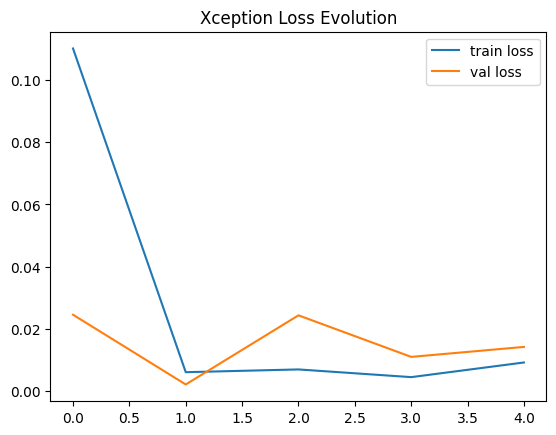

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Xception Loss Evolution')
plt.legend()
plt.show()

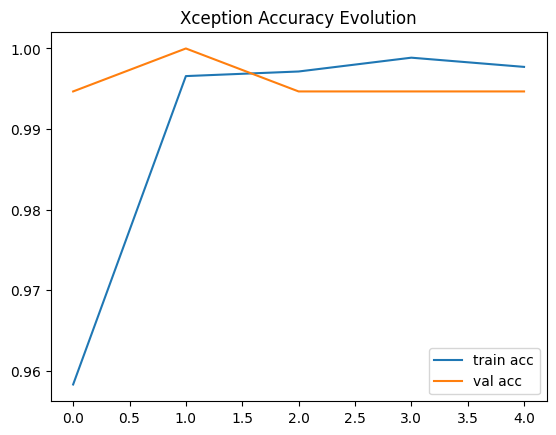

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Xception Accuracy Evolution')
plt.legend()
plt.show()

#Transfer Learning- VGG16

In [ ]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False) 
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers: 
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=val_set, epochs=3)

Epoch 1/3
55/55 [==============================] - 26s 391ms/step - loss: 3.2320 - accuracy: 0.3206 - val_loss: 2.2804 - val_accuracy: 0.3920
Epoch 2/3
55/55 [==============================] - 10s 174ms/step - loss: 1.6664 - accuracy: 0.6337 - val_loss: 0.8275 - val_accuracy: 0.7067
Epoch 3/3
55/55 [==============================] - 10s 172ms/step - loss: 0.5295 - accuracy: 0.7949 - val_loss: 0.3625 - val_accuracy: 0.8560


In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
#metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
history = model.fit(train_set, validation_data=val_set, epochs=5)

Epoch 1/5
55/55 [==============================] - 12s 197ms/step - loss: 0.2297 - accuracy: 0.9434 - val_loss: 0.2385 - val_accuracy: 0.9307
Epoch 2/5
55/55 [==============================] - 9s 165ms/step - loss: 0.2147 - accuracy: 0.9503 - val_loss: 0.2316 - val_accuracy: 0.9413
Epoch 3/5
55/55 [==============================] - 10s 176ms/step - loss: 0.2102 - accuracy: 0.9566 - val_loss: 0.2263 - val_accuracy: 0.9493
Epoch 4/5
55/55 [==============================] - 10s 175ms/step - loss: 0.2065 - accuracy: 0.9537 - val_loss: 0.2416 - val_accuracy: 0.9253
Epoch 5/5
55/55 [==============================] - 11s 192ms/step - loss: 0.2083 - accuracy: 0.9531 - val_loss: 0.2405 - val_accuracy: 0.9280


In [ ]:
results= model.evaluate(test_set)

12/12 [==============================] - 2s 141ms/step - loss: 0.2219 - accuracy: 0.9440


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.2218954861164093, 0.9440000057220459]


In [ ]:
y_pred = model.predict(test_set)

12/12 [==============================] - 2s 186ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes

In [ ]:
class_labels = list(test_set.class_indices.keys())

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
cm

array([[71,  2,  1,  0,  1],
       [ 5, 59,  0,  0, 11],
       [ 0,  0, 74,  0,  1],
       [ 0,  0,  0, 75,  0],
       [ 0,  0,  0,  0, 75]])

In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

       hand0       0.93      0.95      0.94        75
       hand1       0.97      0.79      0.87        75
      hand13       0.99      0.99      0.99        75
       hand5       1.00      1.00      1.00        75
       hand8       0.85      1.00      0.92        75

    accuracy                           0.94       375
   macro avg       0.95      0.94      0.94       375
weighted avg       0.95      0.94      0.94       375



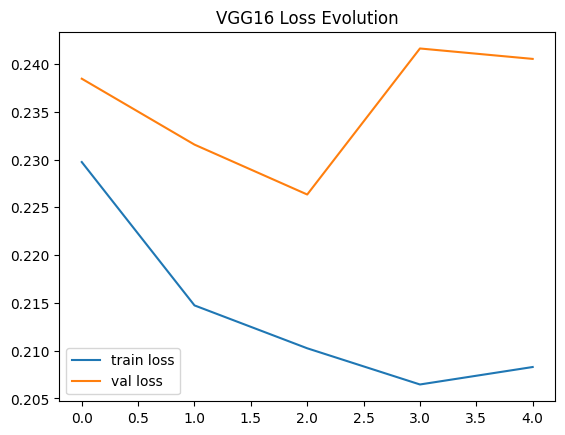

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("VGG16 Loss Evolution")
plt.legend()
plt.show()

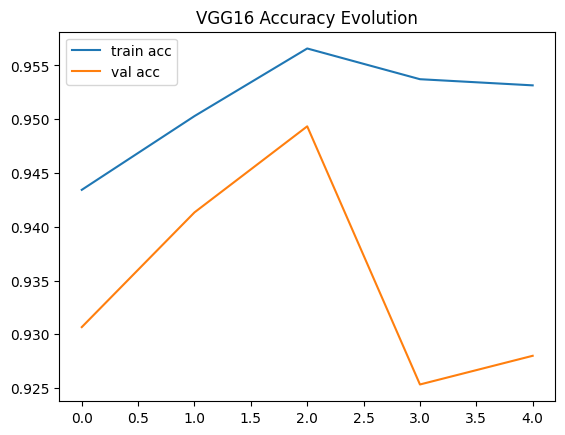

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("VGG16 Accuracy Evolution")
plt.legend()
plt.show()

# Customized CNN 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
history = model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/10
55/55 [==============================] - 16s 210ms/step - loss: 1.6809 - accuracy: 0.2086 - val_loss: 1.6085 - val_accuracy: 0.2000
Epoch 2/10
55/55 [==============================] - 8s 151ms/step - loss: 1.6112 - accuracy: 0.2040 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/10
55/55 [==============================] - 9s 158ms/step - loss: 1.6096 - accuracy: 0.2034 - val_loss: 1.6086 - val_accuracy: 0.2347
Epoch 4/10
55/55 [==============================] - 9s 161ms/step - loss: 1.6132 - accuracy: 0.2343 - val_loss: 1.6056 - val_accuracy: 0.2347
Epoch 5/10
55/55 [==============================] - 9s 169ms/step - loss: 1.5904 - accuracy: 0.2549 - val_loss: 1.5678 - val_accuracy: 0.3200
Epoch 6/10
55/55 [==============================] - 8s 145ms/step - loss: 1.4517 - accuracy: 0.3669 - val_loss: 1.3995 - val_accuracy: 0.4133
Epoch 7/10
55/55 [==============================] - 9s 164ms/step - loss: 1.2334 - accuracy: 0.5183 - val_loss: 1.2144 - val_accuracy: 0.5200
Epoch

In [ ]:
results= model.evaluate(test_set)

12/12 [==============================] - 1s 119ms/step - loss: 1.0660 - accuracy: 0.6933


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[1.0659724473953247, 0.6933333277702332]


In [ ]:
y_pred = model.predict(test_set)

12/12 [==============================] - 1s 110ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[46  6  3  4 16]
 [11 39  9  7  9]
 [10  1 56  5  3]
 [ 1  1  5 67  1]
 [ 9  4  4  6 52]]


In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

       hand0       0.60      0.61      0.61        75
       hand1       0.76      0.52      0.62        75
      hand13       0.73      0.75      0.74        75
       hand5       0.75      0.89      0.82        75
       hand8       0.64      0.69      0.67        75

    accuracy                           0.69       375
   macro avg       0.70      0.69      0.69       375
weighted avg       0.70      0.69      0.69       375



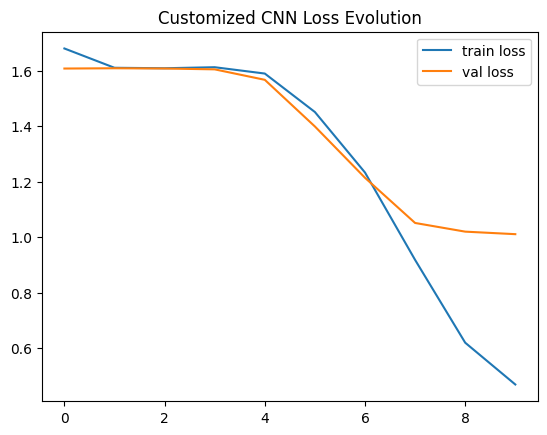

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Customized CNN Loss Evolution")
plt.legend()
plt.show()

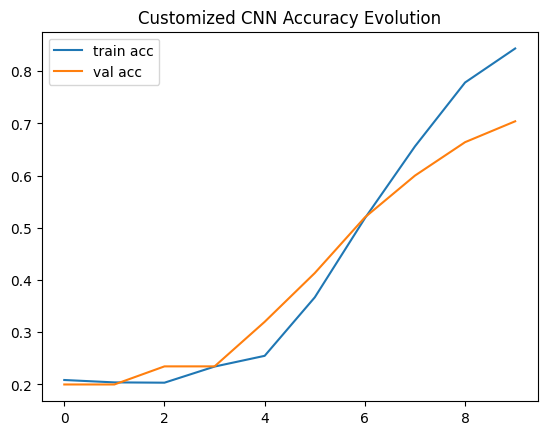

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Customized CNN Accuracy Evolution")
plt.legend()
plt.show()